In [1]:
!pip install mne

import pandas as pd
import numpy as np 
import mne
import matplotlib.pyplot as plt

from sklearn.decomposition import FastICA
import pywt

import tensorflow as tf 
from tensorflow import keras
from keras.models import Model

     |████████████████████████████████| 7.7 MB 5.5 MB/s 
  Created wheel for mne: filename=mne-1.0.1-py3-none-any.whl size=7542700 sha256=cd1f0700554cc3f6e7e0cd5834beb0909396c43371393e855e46f6440e786293
  Stored in directory: /root/.cache/pip/wheels/b1/16/e2/46ea7fb2215890e506fa85526ccbc2145663ad12c356d04c35
Successfully built mne


In [51]:
raw=mne.io.read_raw_gdf('/content/drive/MyDrive/Brain Computer Interface/data/A01T.gdf')
print(raw.info)

Extracting EDF parameters from /content/drive/MyDrive/Brain Computer Interface/data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


/usr/local/lib/python3.7/dist-packages/mne/io/edf/edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [54]:
df = raw.to_data_frame() 

In [53]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(df)

TypeError: ignored

In [ ]:
df_n = pd.DataFrame(y_km)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df_n)

print(onehot_encoded.shape)

(648775, 3)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_transformed, onehot_encoded, train_size=0.7, random_state=7)
st = StandardScaler()
X_transform = st.fit_transform(X_train)
X_test_t = st.fit_transform(X_test)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Brain Computer Interface/model/cnn1d_lstm.h5')

In [ ]:
history = model.fit(X_transform,y_train,validation_split=0.3,epochs=50,batch_size=64,verbose=1)

Epoch 1/50
4968/4968 [==============================] - 92s 18ms/step - loss: 1.0954 - accuracy: 0.3741 - val_loss: 1.0766 - val_accuracy: 0.4128
Epoch 2/50
4968/4968 [==============================] - 85s 17ms/step - loss: 1.0350 - accuracy: 0.4617 - val_loss: 0.9603 - val_accuracy: 0.5638
Epoch 3/50
4968/4968 [==============================] - 86s 17ms/step - loss: 0.9610 - accuracy: 0.5288 - val_loss: 0.8590 - val_accuracy: 0.6383
Epoch 4/50
4968/4968 [==============================] - 86s 17ms/step - loss: 0.9107 - accuracy: 0.5634 - val_loss: 0.7888 - val_accuracy: 0.6838
Epoch 5/50
4968/4968 [==============================] - 84s 17ms/step - loss: 0.8711 - accuracy: 0.5869 - val_loss: 0.7938 - val_accuracy: 0.6572
Epoch 6/50
4968/4968 [==============================] - 85s 17ms/step - loss: 0.8344 - accuracy: 0.6055 - val_loss: 0.7640 - val_accuracy: 0.6522
Epoch 7/50
4968/4968 [==============================] - 80s 16ms/step - loss: 0.8144 - accuracy: 0.6143 - val_loss: 0.7318 -

KeyboardInterrupt: ignored

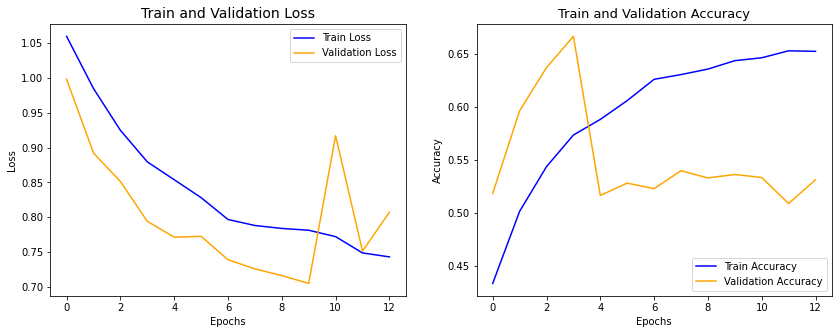

In [ ]:
epochs = [i for i in range(13)]
loss_train = history.history['loss']
acc_train = history.history['accuracy']
loss_test = history.history['val_loss']
acc_test = history.history['val_accuracy']


fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(epochs, loss_train, color='blue', label='Train Loss')
ax[0].plot(epochs, loss_test, color='orange', label='Validation Loss')
ax[0].set_title('Train and Validation Loss', fontsize=14)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()



ax[1].plot(epochs, acc_train, color='blue', label='Train Accuracy')
ax[1].plot(epochs, acc_test, color='orange',  label='Validation Accuracy')
ax[1].set_title('Train and Validation Accuracy', fontsize=13)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [ ]:
import time 
s1 = time.time()
y_pred = model.predict(X_test_t)
s2 = time.time()
s = s2 -s1 
print(s)

16.95814538002014
